In [1]:
# check environment
!pip freeze

cycler==0.11.0
fonttools==4.29.1
kiwisolver==1.3.2
matplotlib==3.5.1
numpy==1.22.2
packaging==21.3
pandas==1.4.0
Pillow==9.0.1
pyparsing==3.0.7
python-dateutil==2.8.2
pytz==2021.3
scipy==1.8.0
seaborn==0.11.2
six==1.16.0


In [29]:
# import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# load data
df = pd.read_csv('./dataset/bodyPerformanceI.csv')

## Understanding data

In [5]:
df.head()

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0  24.0      F      152.4       42.5        23.4       57.0     112.0   
1  27.0      F      162.1       70.9        35.7       97.0     148.0   
2  23.0      M      173.7       68.3        13.6       76.0     137.0   
3  31.0      M      168.2       70.5        15.5       82.0     145.0   
4  25.0      M      175.1       64.8         6.9       65.0     118.0   

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0       27.4                     14.2            50.0          184.0     C  
1       30.6                     11.0            42.0          157.0     D  
2       47.7                     16.5            48.0          208.0     C  
3       39.6                     19.9            66.0          264.0     C  
4       42.0                     19.8            49.0          252.0     B

In [6]:
df.tail()

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
7010  21.0      M      179.6       78.6        16.3       64.0     118.0   
7011  56.0      M      166.8       64.0        21.4       75.0     132.0   
7012  26.0      M      177.4       78.3        14.0       74.0     115.0   
7013  49.0      M      177.2       83.0        19.7       98.0     158.0   
7014  43.0      F      161.5       49.9        29.8       79.0     155.0   

      gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
7010       54.1                     25.9            58.0          248.0     B  
7011       50.7                     13.0            36.0          197.0     B  
7012       53.3                     15.3            63.0          234.0     A  
7013       40.2                     14.9            50.0          203.0     C  
7014       21.0                     16.5            23.0          146.0     C

In [7]:
df.shape

(7015, 12)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7015 entries, 0 to 7014
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      7015 non-null   float64
 1   gender                   7015 non-null   object 
 2   height_cm                7015 non-null   float64
 3   weight_kg                7015 non-null   float64
 4   body fat_%               7015 non-null   float64
 5   diastolic                7015 non-null   float64
 6   systolic                 7015 non-null   float64
 7   gripForce                7015 non-null   float64
 8   sit and bend forward_cm  7015 non-null   float64
 9   sit-ups counts           7015 non-null   float64
 10  broad jump_cm            7015 non-null   float64
 11  class                    7015 non-null   object 
dtypes: float64(10), object(2)
memory usage: 657.8+ KB


In [9]:
df.nunique()

age                         44
gender                       2
height_cm                  430
weight_kg                  997
body fat_%                 411
diastolic                   78
systolic                    87
gripForce                  492
sit and bend forward_cm    426
sit-ups counts              77
broad jump_cm              220
class                        4
dtype: int64

In [8]:
df.describe()

age    height_cm    weight_kg   body fat_%    diastolic  \
count  7015.000000  7015.000000  7015.000000  7015.000000  7015.000000   
mean     36.801283   168.751732    67.046887    22.642606    78.648952   
std      13.649180     8.256259    11.242355     6.796773    10.675237   
min      21.000000   125.000000    34.400000     3.500000     6.000000   
25%      25.000000   162.900000    58.500000    17.800000    71.000000   
50%      32.000000   169.400000    67.400000    22.200000    79.000000   
75%      48.000000   174.700000    74.700000    27.100000    86.000000   
max      64.000000   193.800000   125.700000    54.900000   156.200000   

          systolic    gripForce  sit and bend forward_cm  sit-ups counts  \
count  7015.000000  7015.000000              7015.000000     7015.000000   
mean    130.364490    37.289624                15.790925       40.614597   
std      14.538937    10.443406                 6.973073       13.075697   
min      43.900000     0.000000               -20.000000        0.000000   
25%     120.000000    27.800000                11.800000       32.000000   
50%     130.000000    38.700000                16.000000       42.000000   
75%     141.000000    45.200000                20.000000       50.000000   
max     193.000000    69.900000               213.000000       78.000000   

       broad jump_cm  
count    7015.000000  
mean      191.824391  
std        38.528746  
min         0.000000  
25%       163.000000  
50%       195.000000  
75%       222.000000  
max       295.000000

In [11]:
df['class'].unique()

array(['C', 'D', 'B', 'A'], dtype=object)

## cleaning the data

In [13]:
# check the number of null values
df.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

## relationship analysis

In [14]:
corelation = df.corr()

<AxesSubplot:>

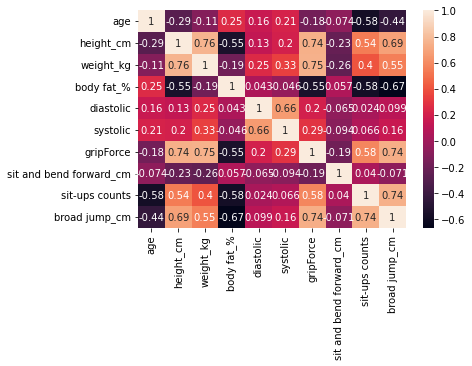

In [15]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

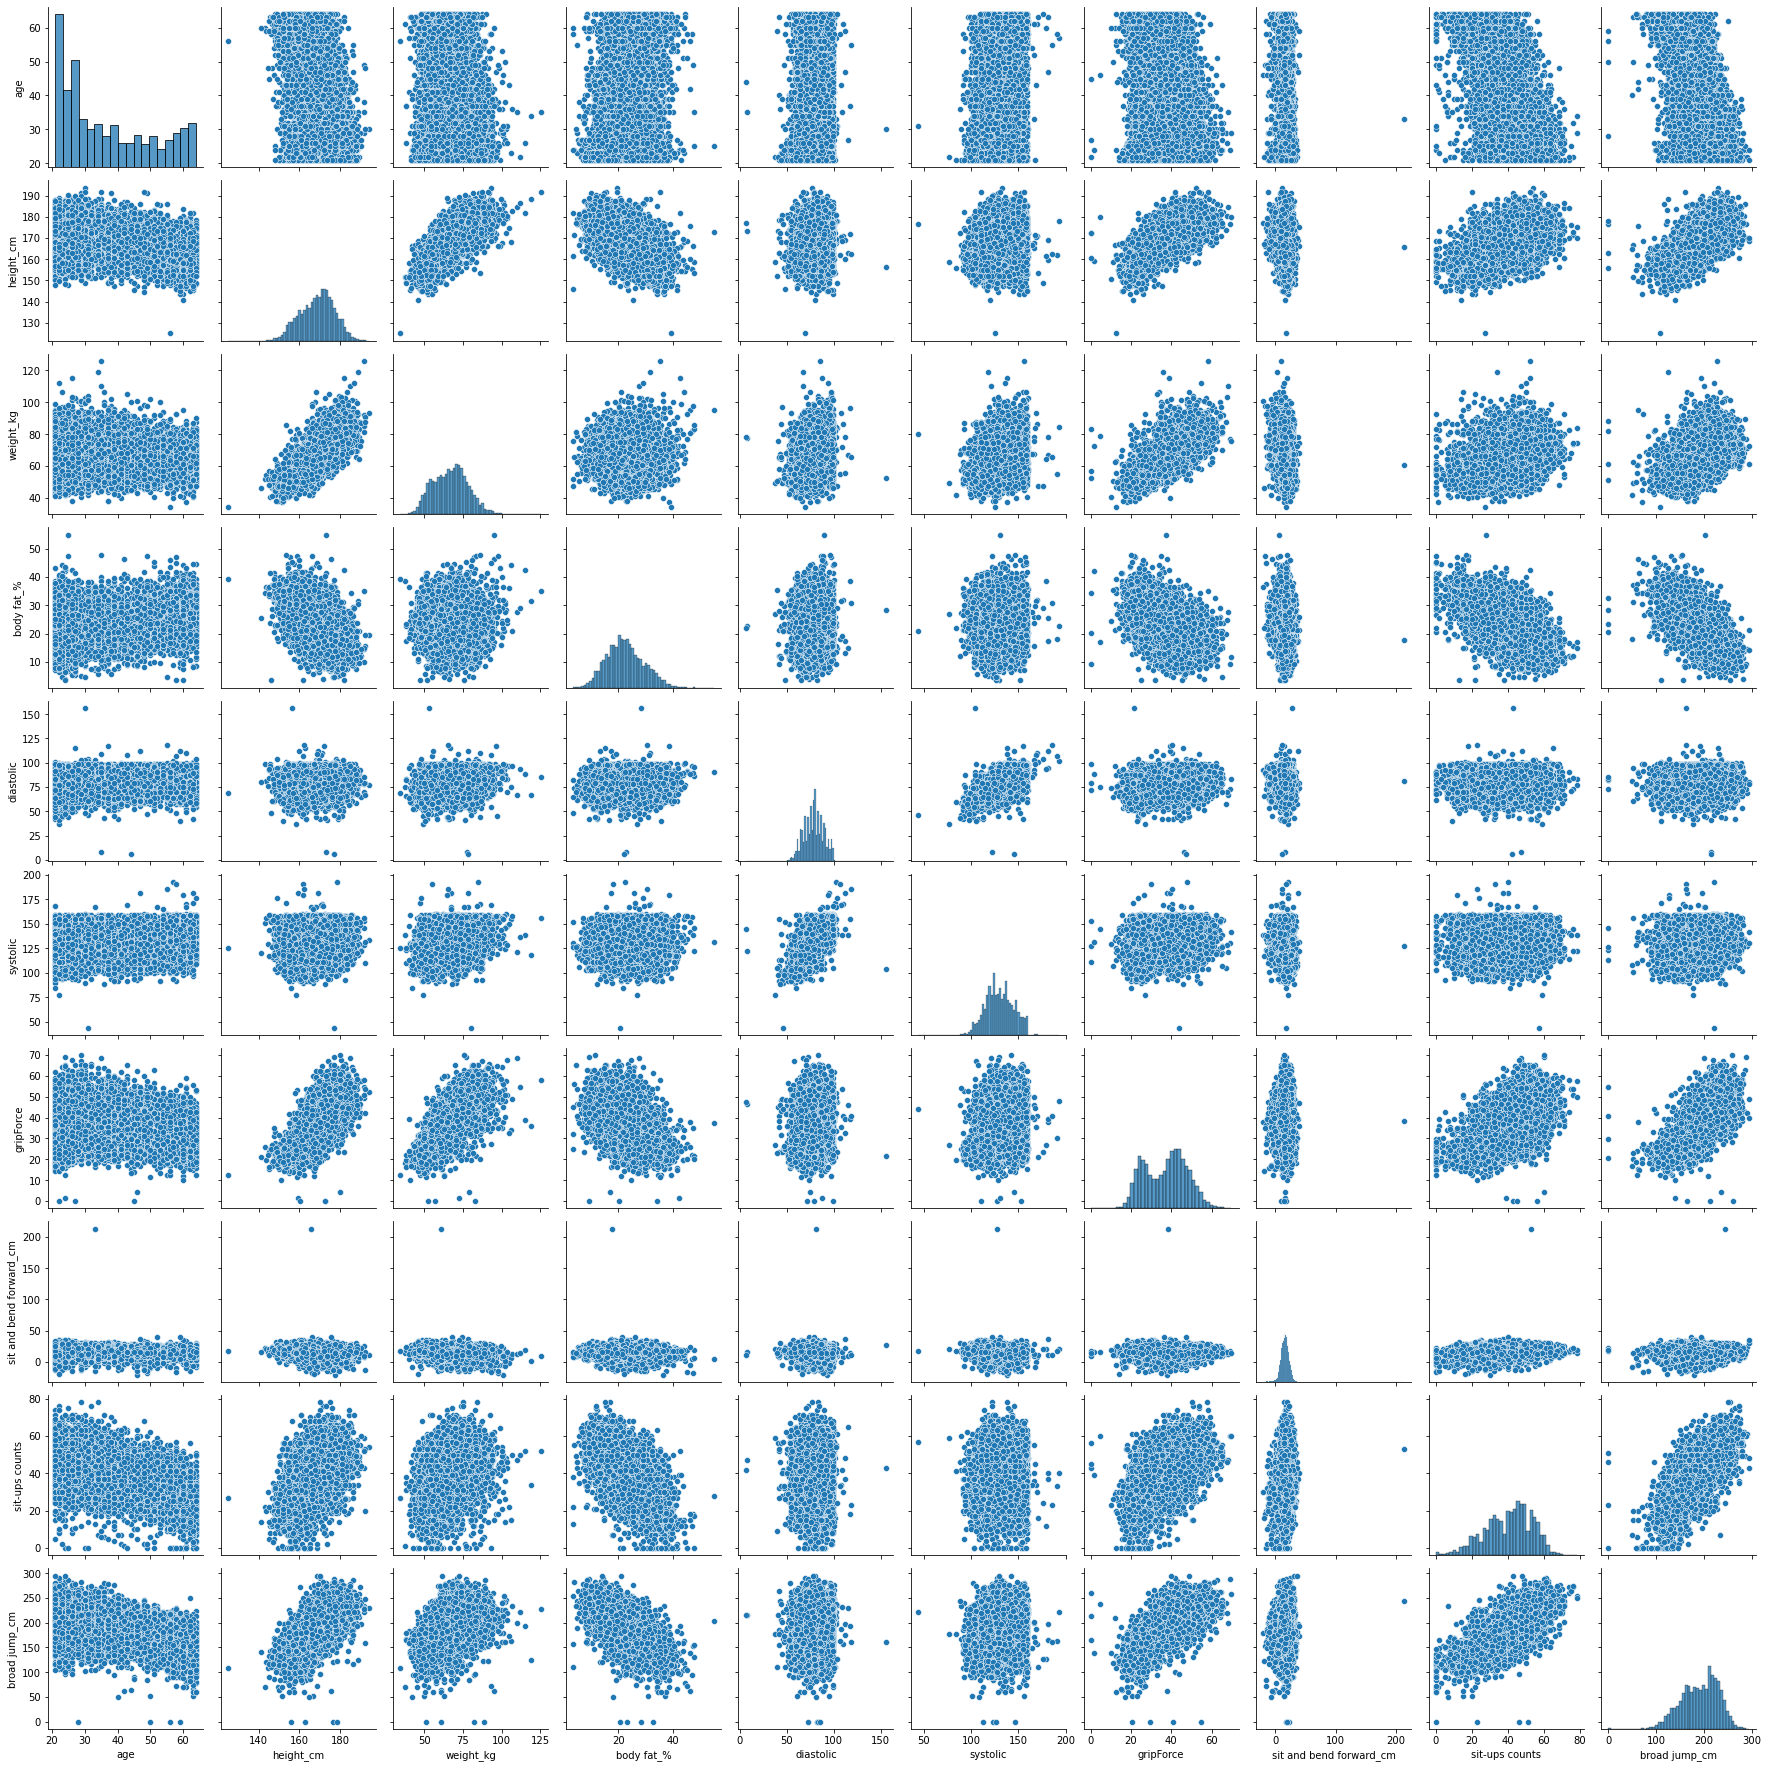

In [26]:
sns.pairplot(df)

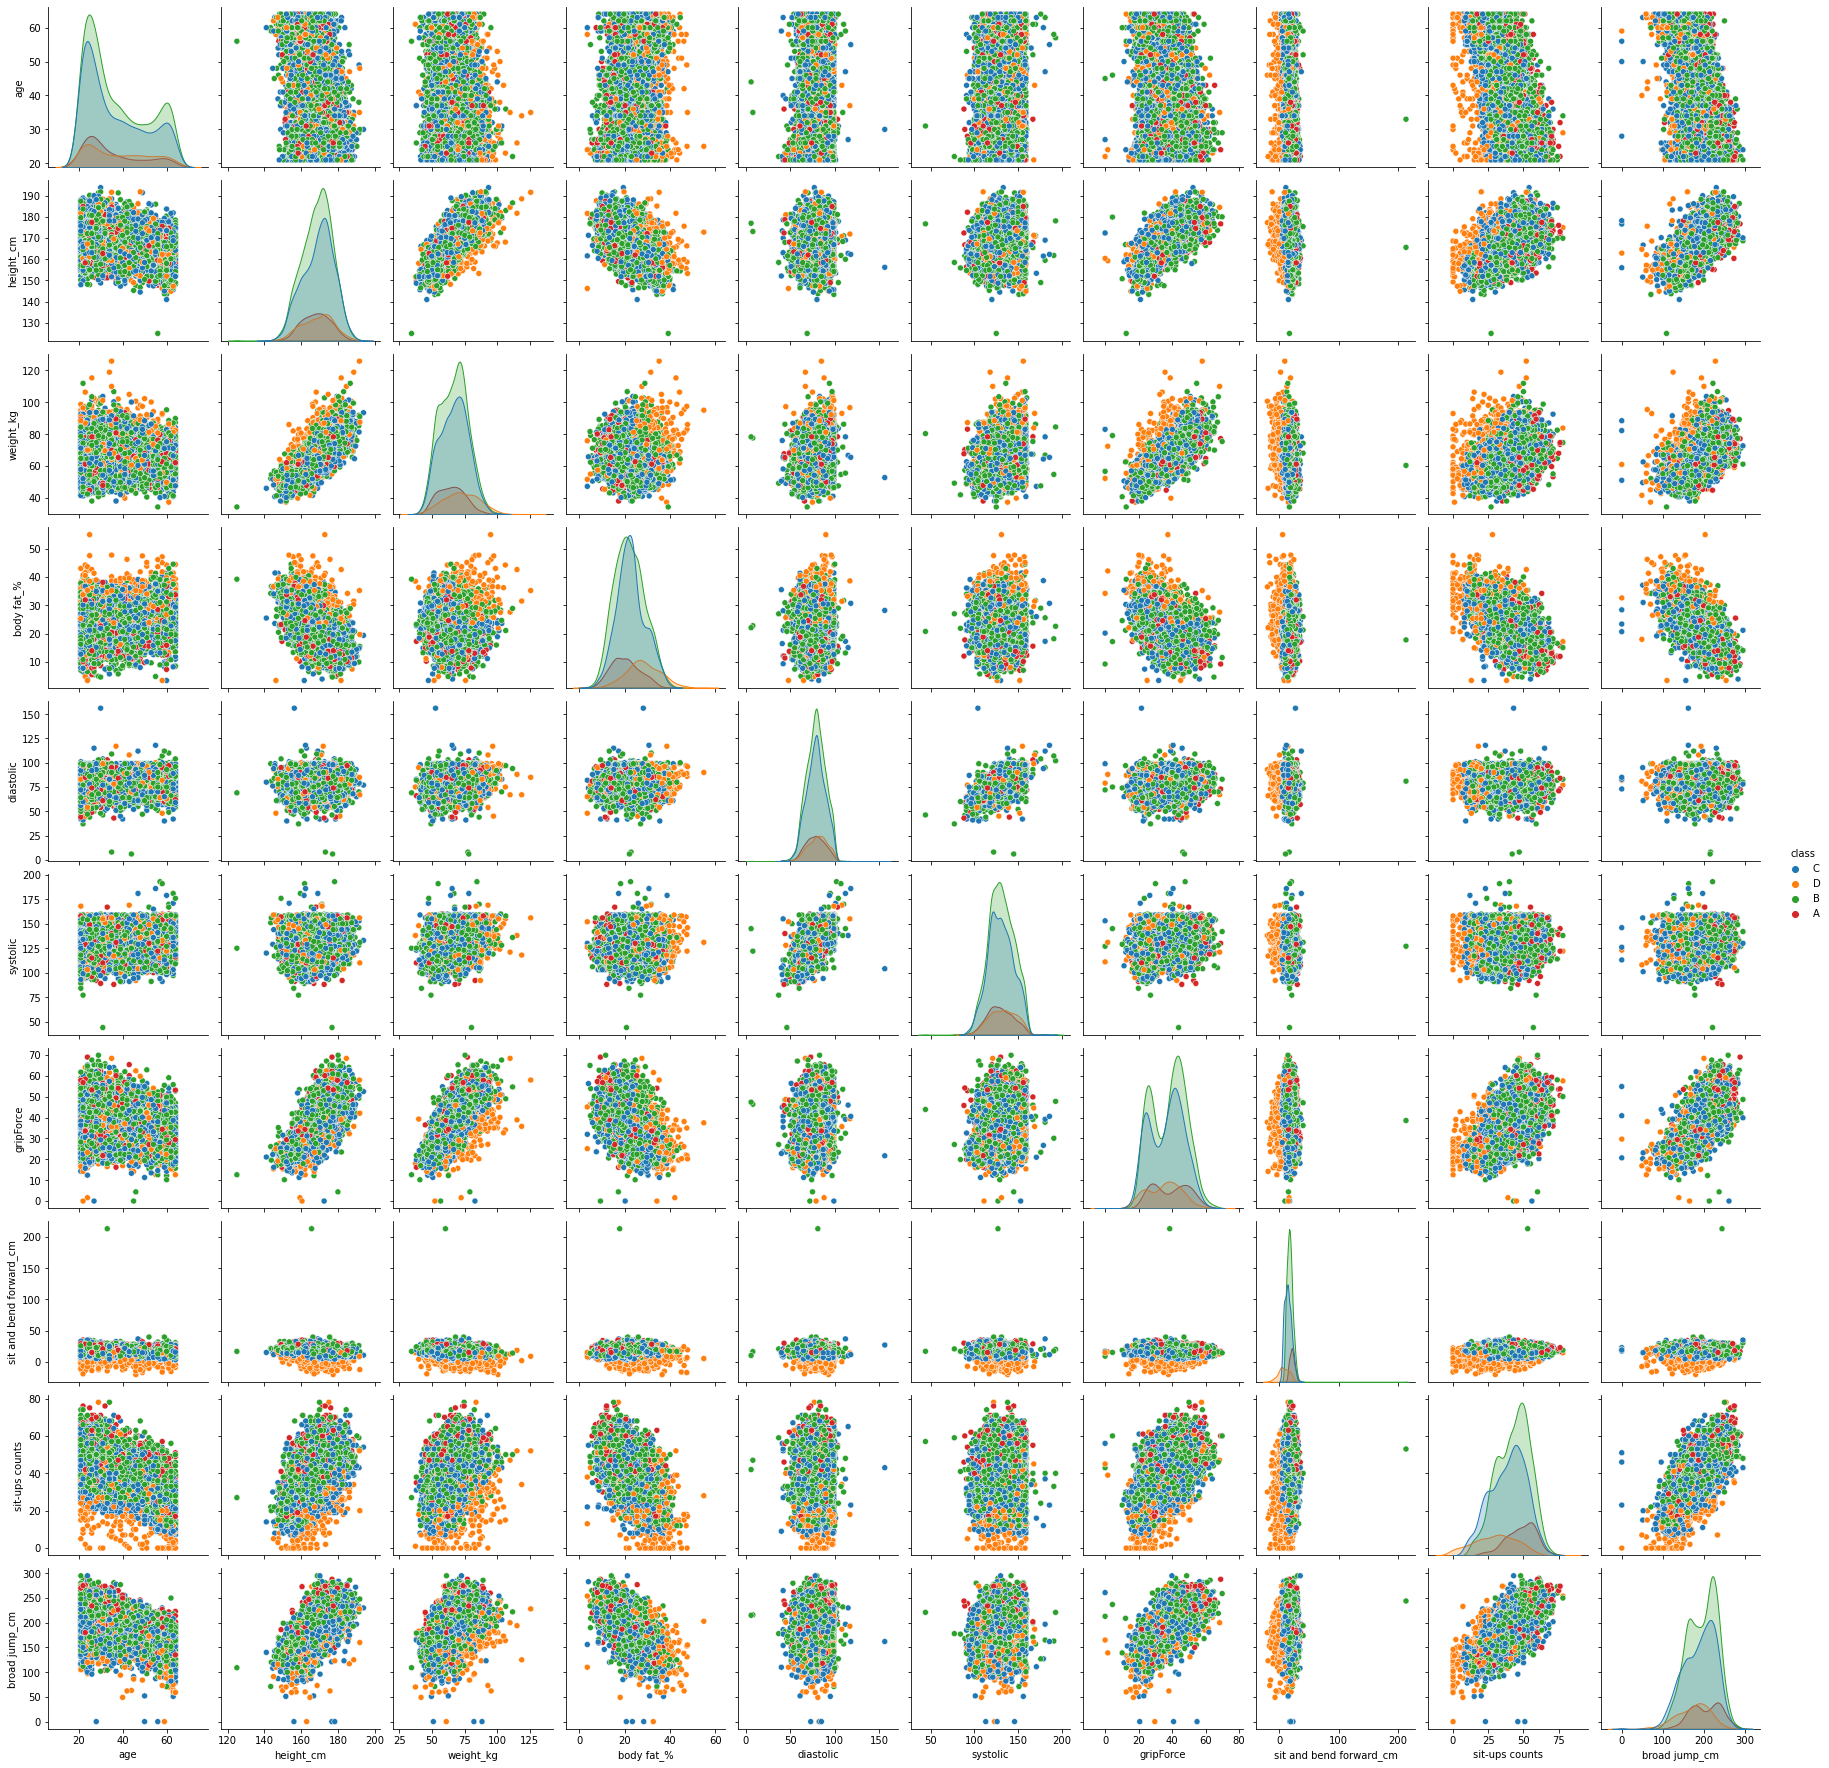

In [22]:
sns.pairplot(df, hue='class')

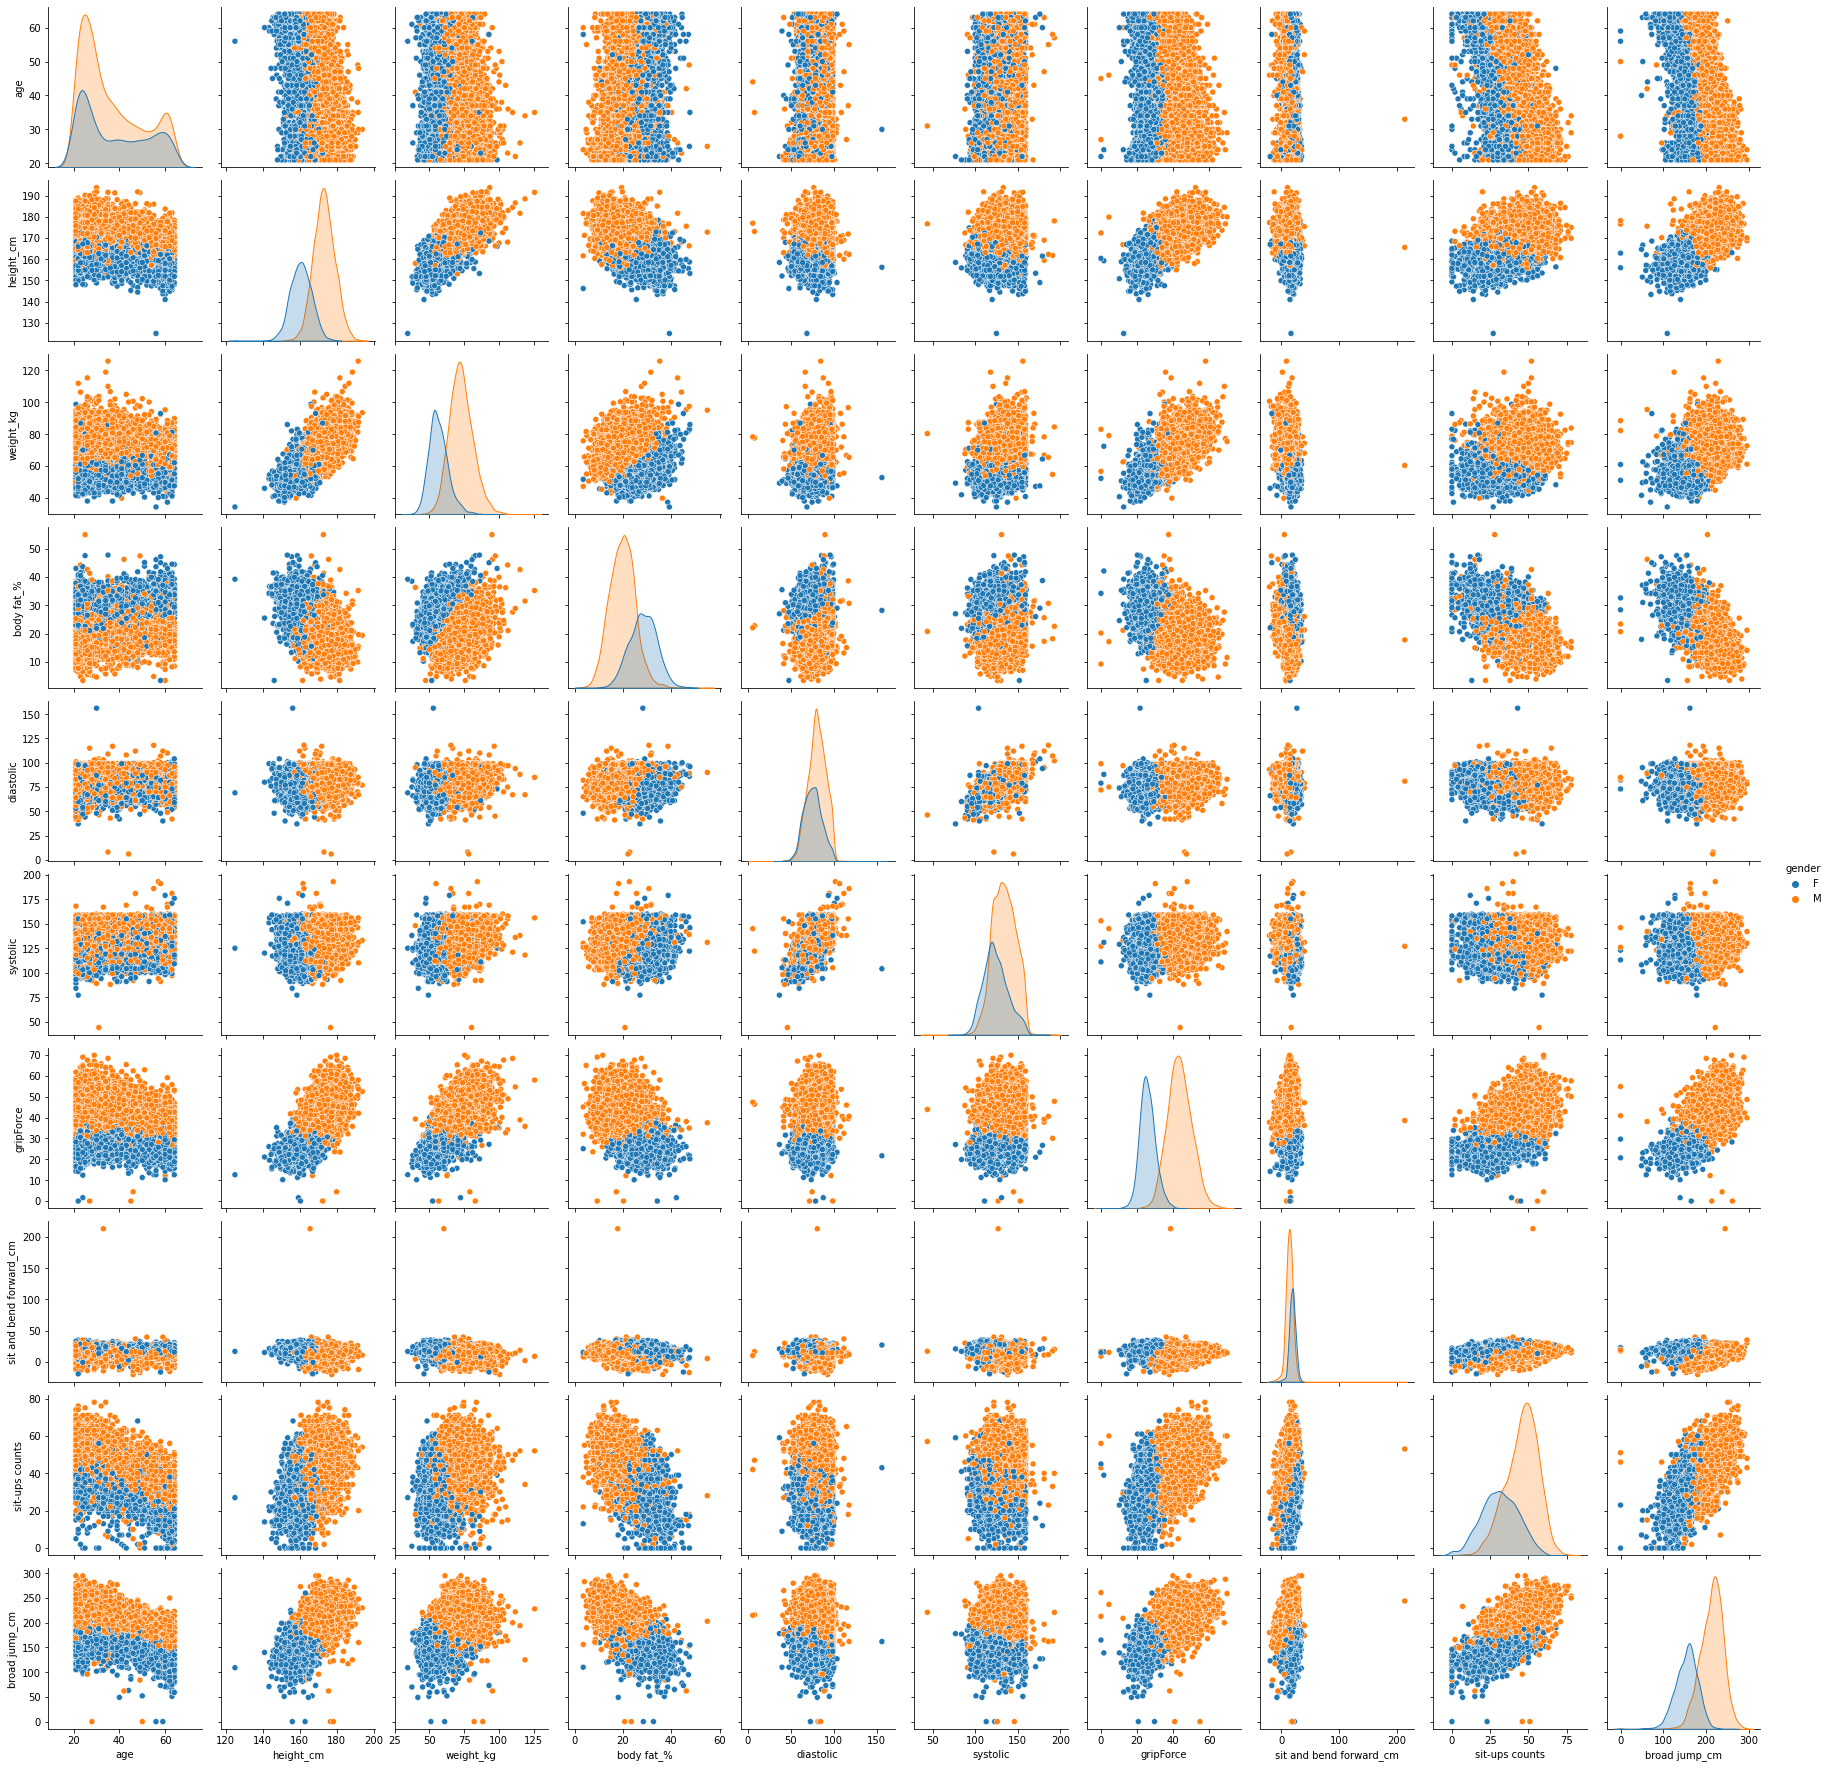

In [23]:
sns.pairplot(df, hue='gender')

# boys are taller, have  more body fat, heavier  than girls 

## direct proportional means if the first value is high and the second is also higher

# direct proportionals:
* height, weight
* height, grip force
* height, sit-ups
* height, broad jump
* weight, grip force
* diastolic, systolic
* grip force, sit-ups
* grip force, broad jump
* sit-ups, broad jumps

## inversely proportional means if the first value is high but the second is low
# inversely proportionals:
* height, body fat
* body fat, grip force
* body fat, sit-ups
* body fat, broad jump